<a href="https://colab.research.google.com/github/olyvias/python/blob/main/TUGAS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy dan Matplotlib (Path Loss Simulation)
## OLYVIA FERNANDA SOEDRADJAT / 1101208479 / TTX-44-01

In [39]:
import numpy as np
import matplotlib.pyplot as plt


In [40]:
np.zeros(4)

array([0., 0., 0., 0.])

In [41]:
np.ones(3)

array([1., 1., 1.])

**(Baris,Kolom)**

In [42]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [43]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [44]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
np.arange(3,47,4)

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39, 43])

Arange = (Awal,Akhir,delta)

In [47]:
np.arange(4,5,0.1)

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [48]:
np.arange(2,-4,-0.5)

array([ 2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. ,
       -3.5])

In [49]:
np.linspace(2,10,4)

array([ 2.        ,  4.66666667,  7.33333333, 10.        ])

In [50]:
np.linspace(2,-4,4)

array([ 2.,  0., -2., -4.])

In [51]:
e=np.arange(0,20,2)

In [52]:
len(e)

10

In [53]:
e.reshape(5,2)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [54]:
e.reshape(2,5)

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [55]:
print(e)

[ 0  2  4  6  8 10 12 14 16 18]


In [56]:
f=e.reshape(5,2)

In [57]:
print(f)

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]


In [58]:
np.random.random((3,4))

array([[0.71598254, 0.59429137, 0.38288993, 0.67806278],
       [0.70687433, 0.73387642, 0.46180095, 0.84485691],
       [0.05761402, 0.39500069, 0.95082326, 0.46795282]])

In [59]:
np.random.randint(1,20,10)

array([ 7, 15,  9,  6, 12,  3,  3,  6, 11, 13])

In [60]:
np.random.randn(3)

array([-2.11796023, -0.3313827 , -0.15694404])

# **Grafik Frekuensi 1800MHz pada Daerah Urban, Open, dan Sub Urban**

In [61]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [62]:
f=1800 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [63]:
print(d)

[280 341 215 580 357 417 328 245 417 532 456 623 528 495 464 525 222 645
 339 313 215 563 656 653 494 437 234 532 325 264 506 276 528 433 697 331
 683 440 509 458 236 644 226 300 663 392 584 657 208 435 524 416 517 242
 302 556 346 675 311 217 675 589 233 206 310 321 590 599 448 633 668 596
 609 586 468 546 683 514 303 366 217 697 644 226 263 310 604 557 625 668
 331 484 629 272 657 375 276 474 257 258 537 497 669 297 535 548 343 371
 392 689 273 429 438 475 436 324 305 513 440 536 296 275 430 476 418 449
 676 493 395 539 256 563 442 480 643 288 315 369 308 597 497 401 310 427
 489 461 441 655 263 412 573 681 443 621 494 537 242 632 510 556 256 636
 245 544 263 615 445 432 534 636 237 253 495 538 530 604 486 412 568 490
 436 461 546 413 221 300 546 300 234 688 357 650 284 342 336 648 329 374
 382 445]


In [64]:
LpUrban=cos(f,loc1,tower,user,d)
LpOpen=cos(f,loc2,tower,user,d)
LpSuburban=cos(f,loc3,tower,user,d)

In [65]:
print(LpUrban, LpOpen, LpSuburban)

[174.3803199  177.15661694 170.65941807 184.63846041 177.80251748
 179.99082068 176.60910082 172.49936498 179.99082068 183.42162621
 181.25022312 185.64588579 183.31531448 182.40620954 181.49520734
 183.2350508  171.11073201 186.13473173 177.07375648 175.94971816
 170.65941807 184.21941631 186.37293666 186.30837014 182.37772371
 180.65071828 171.85228415 183.42162621 176.47967047 173.55147864
 182.71580964 174.17763673 183.31531448 180.52118874 187.22690949
 176.73735273 186.94109196 180.74708972 182.79907828 181.31186977
 171.97216775 186.11287566 171.36227866 175.35216988 186.52245082
 179.11994775 184.73527342 186.39439323 170.19316433 180.5861024
 183.20819429 179.95700017 183.01875116 172.32581571 175.44576648
 184.04317869 177.36166041 186.77512553 175.85942145 170.78984712
 186.77512553 184.85536142 171.79195756 170.05706436 175.81405511
 176.30522567 184.87925665 185.09250907 181.00090267 185.87019368
 186.62828331 185.02178304 185.32573025 184.78343154 181.61611999
 183.787523

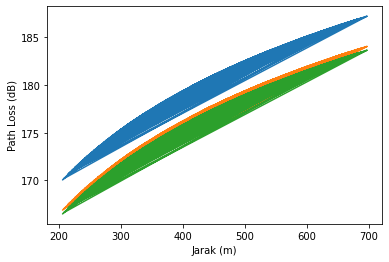

In [66]:
plt.figure()
plt.plot(d,LpUrban)
plt.plot(d,LpOpen)
plt.plot(d,LpSuburban)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [67]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban[np.argsort(d)]
Open_sort2=LpOpen[np.argsort(d)]
Suburban_sort3=LpSuburban[np.argsort(d)]

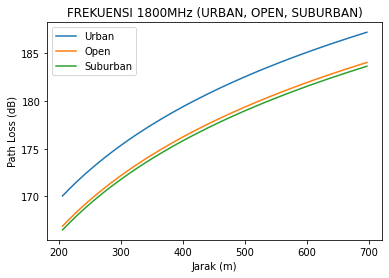

In [68]:
plt.figure()
plt.title('FREKUENSI 1800MHz (URBAN, OPEN, SUBURBAN)')
plt.plot(d_sort,Urban_sort1, label='Urban')
plt.plot(d_sort,Open_sort2, label="Open")
plt.plot(d_sort,Suburban_sort3, label="Suburban")
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

# **Grafik Model Urban pada Frekuensi 700MHz, 900MHz, dan 1800MHz**

In [69]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [70]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [71]:
print(d)

[561 677 252 476 434 620 651 380 323 405 423 665 452 689 668 257 683 438
 452 367 612 460 226 281 636 262 485 227 499 205 610 638 464 298 379 539
 695 404 545 250 467 271 206 215 365 403 484 383 287 678 614 294 298 643
 273 554 392 373 543 681 637 638 354 695 518 623 449 397 670 620 231 657
 696 525 439 629 256 416 284 491 456 658 675 435 546 495 466 606 483 311
 550 695 293 625 212 610 525 545 218 251 203 624 329 232 591 405 270 383
 664 676 268 200 256 480 505 509 354 377 565 258 294 652 639 512 548 669
 622 315 468 403 479 630 290 403 695 544 334 460 303 378 423 381 325 336
 454 408 583 459 341 654 421 301 221 389 489 692 603 408 665 292 408 563
 367 498 662 565 474 418 559 309 441 664 419 256 571 694 523 643 391 258
 365 448 500 392 311 261 451 510 285 498 685 202 341 395 595 572 529 699
 557 489]


In [72]:
LpUrban700=cos(f1,loc,tower,user,d)
LpUrban900=cos(f2,loc,tower,user,d)
LpUrban1800=cos(f3,loc,tower,user,d)

In [73]:
print(LpUrban700, LpUrban900, LpUrban1800)

[171.53022981 174.17774333 160.25712916 169.215818   167.91462547
 172.93883345 173.6261033  166.04294086 163.75366062 166.94045696
 167.55299858 173.92582179 168.487057   174.4252385  173.98922581
 160.53388143 174.30203447 168.04385791 168.487057   165.55260732
 172.75589273 168.73419031 158.72322116 161.79148078 173.2977379
 160.80530095 169.47966783 158.78541216 169.88052278 157.34946056
 172.7097839  173.34196474 168.85614984 162.61888971 166.00582296
 170.96670516 174.54737427 166.90563312 171.12264296 160.14488762
 168.94693149 161.28105401 157.41800686 158.02036057 165.47563315
 166.87072297 169.45059406 166.15371132 162.08908841 174.19853483
 172.80185113 162.42853225 162.61888971 173.45192813 161.38462975
 171.35335993 166.48089026 165.7810378  171.07085527 174.26072582
 173.31986868 173.34196474 165.04458808 174.54737427 170.40691345
 173.0068283  168.39325263 166.65942544 174.03133717 172.93883345
 159.03146623 173.75533574 174.56762767 170.59599331 168.07598161
 173.141841

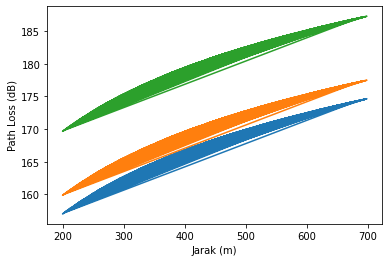

In [74]:
plt.figure()
plt.plot(d,LpUrban700)
plt.plot(d,LpUrban900)
plt.plot(d,LpUrban1800)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [75]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban700[np.argsort(d)]
Urban_sort2=LpUrban900[np.argsort(d)]
Urban_sort3=LpUrban1800[np.argsort(d)]

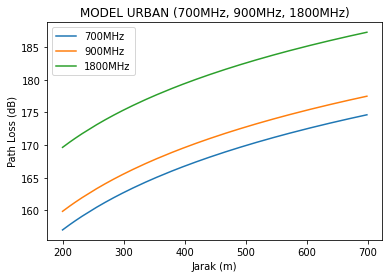

In [76]:
plt.figure()
plt.plot(d_sort,Urban_sort1, label='700MHz')
plt.plot(d_sort,Urban_sort2, label='900MHz')
plt.plot(d_sort,Urban_sort3, label='1800MHz')
plt.legend()
plt.title('MODEL URBAN (700MHz, 900MHz, 1800MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()